In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

original_output = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/Original_Outputs.csv', sep=',', skiprows=[0], header=None)
#print(original_output.value_counts())
#print(original_output)
original = original_output.values.flatten()

current_output = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/Current_Output.csv', sep=',', skiprows=[0], header=None)
current_output = current_output.replace(0, 'Dos')
current_output = current_output.replace(1, 'Probe')
current_output = current_output.replace(2, 'R2L')
current_output = current_output.replace(4, 'normal')
current_output = current_output.replace(3, 'U2R')
#print(current_output.value_counts())
#print(current_output)
current = current_output.values.flatten()

sdv_output = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/CR.csv', sep=',', skiprows=[0], header=None)
sdv_output = sdv_output.replace(1, 'R2L')
sdv_output = sdv_output.replace(2, 'normal')
sdv_output = sdv_output.replace(0, 'Other')
#print(sdv_output.value_counts())
#print(sdv_output)
CR = sdv_output.values.flatten()

sdv_output_binary = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/CN.csv', sep=',', skiprows=[0], header=None)
#print(sdv_output_binary.value_counts())
#print(sdv_output_binary)
CN = sdv_output_binary.values.flatten()
#print(sdv_binary)

sdv_output = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/CD.csv', sep=',', skiprows=[0], header=None)
sdv_output = sdv_output.replace(1, 'Dos')
sdv_output = sdv_output.replace(2, 'normal')
sdv_output = sdv_output.replace(0, 'Other')
#print(sdv_output.value_counts())
#print(sdv_output)
CD = sdv_output.values.flatten()

sdv_output = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/CP.csv', sep=',', skiprows=[0], header=None)
sdv_output = sdv_output.replace(1, 'Probe')
sdv_output = sdv_output.replace(2, 'normal')
sdv_output = sdv_output.replace(0, 'Other')
#print(sdv_output.value_counts())
#print(sdv_output)
CP = sdv_output.values.flatten()

collective_decision = current


for i in range(len(current)):
  if CD[i] == 'Dos':
    if current[i] != 'Dos':
      collective_decision[i] = 'Dos'

for i in range(len(current)):
  if CR[i] == 'R2L':
    if current[i] == 'normal':
      collective_decision[i] = 'R2L'

for i in range(len(current)):
  if CP[i] == 'Probe':
    if current[i] != 'Probe':
      collective_decision[i] = 'Probe'

for i in range(len(current)):
  if CN[i] == 0:
    collective_decision[i] = 'normal'
'''
for i in range (len(current)):
  if current[i] == 'normal':
    if CR[i] == 'R2L':
      if CN[i] != 1:
        collective_decision[i] = 'R2L'
'''
print(collective_decision)

matches = 0

for i in range (len(original)):
  if original[i] == collective_decision[i]:
    matches += 1

print((matches*100)/22544)

['Dos' 'Dos' 'R2L' ... 'Dos' 'R2L' 'Probe']
83.47232079489


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

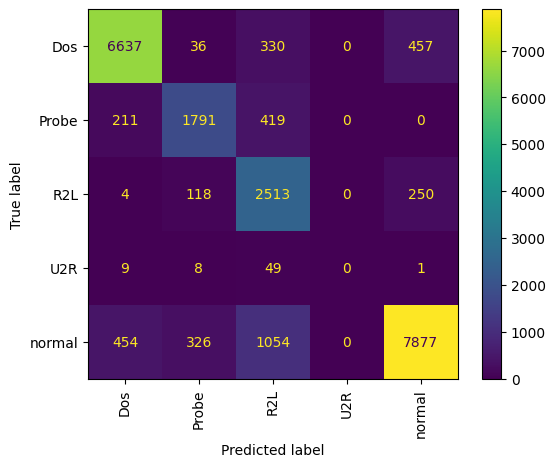

In [ ]:
# Calculate the confusion matrix
labels = np.unique(np.concatenate((original, collective_decision)))
cm = confusion_matrix(original, collective_decision, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation='vertical')

# Show the plot
plt.show()
